In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [2]:
# undirected graph
edge_list = [(0,2),(0,1),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [3]:
goal = 7

In [4]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [14]:
position = nx.spring_layout(G)

#### To visalization use spring_layout force directed method (minimize overlapping edges)

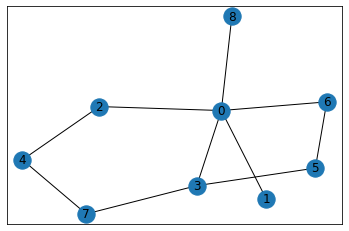

In [15]:
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.show()

# Reward Table & Q Table :

In [21]:
SIZE_MATRIX = 9

### Reward matrix (initialize with -1)
##### rows & columns represent states

- 0 : not lead to goal 
- 100 : lead to goal 
- -1 : not connected

In [22]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX,SIZE_MATRIX)))
R*=-1

In [29]:
for edge in edge_list:
    print(edge)
    ### every edge that lead to goal (7) reward is 100
    if edge[1]==goal :
        R[edge]=100
    else :
        R[edge]=0
    ### because undirected graph 
    if edge[0]==goal :
        R[edge[::-1]]=100
    else :
        R[edge[::-1]]=0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [30]:
R[goal,goal]=100

In [31]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

#### discount factor (for furture rewards )

In [68]:
gamma = 0.8 

### Q Table : 
##### rows & columns represent nodes

In [32]:
Q = np.matrix(np.zeros([SIZE_MATRIX,SIZE_MATRIX]))

In [33]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### helper function to explore graph & populate Q_values
- all actions where the rewards are 0 or greater are available from the current state
- action is edge

In [50]:
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row>=0)[1]
    return available_actions

### helper function to choos next  state at random

In [51]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions,size=1))
    return next_action

### helper function to update Q_values in the current Q_Table

In [58]:
def update(current_state_row,action,gamma):
    
    ### for finding the index of action with highest value
    max_index     = np.where(Q[action,]==np.max(Q[action,]))[1]
    print("max_index",max_index.shape)
    
    ### if there is more than 1 action choose randomly
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index,size=1))
    else :
        max_index = int(max_index)
        
    max_value = Q[action,max_index]
    
    Q[current_state_row,action] = R[current_state_row,action] + gamma* max_value
    
    print("max_value",R[current_state_row,action] + gamma* max_value)

In [59]:
initial_state = 0

In [61]:
available_actions = get_available_actions(initial_state)

In [62]:
print(available_actions)

[1 2 3 6 8]


In [65]:
action = sample_next_action(available_actions)

In [66]:
action

2

In [69]:
update(initial_state,action,gamma)

max_index (9,)
max_value 0.0
